In [1]:

from xbbg import blp

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import datetime
from dateutil.relativedelta import relativedelta


In [2]:
def hist_data(tickers, start_date, end_date, condition = "PX_CLOSE_1D"):
    # Return a matrix of prices, with modifiable pricing condition
    data = blp.bdh(tickers, condition, start_date,end_date)
    data = data.dropna()
    clean_cols = []
    for col in data.columns:
        clean_cols.append(col[0])
    data.columns = clean_cols
    return data

In [3]:

def corr_matrix(params, end_date, lookback_days, offset_days):
    start_date = end_date - relativedelta(days = lookback_days)
    data = hist_data(tickers = params, start_date = start_date, end_date = end_date)
    
    # Always take differenced correlations; log doesn't matter here
    data_diff = data.diff().dropna()
    scaler =  StandardScaler()
    
    # Create mask matrix to remove trivial diagnonal correlations
    matrix = np.zeros_like(data_diff.corr())
    np.fill_diagonal(matrix,1)
    
    # Plot styling
    sns.set(style = "white")
    cmap = sns.diverging_palette(10, 250, as_cmap = True)
    cmap_compare = sns.diverging_palette(10, 250, as_cmap = True)
    
    
    plt.figure(figsize = (24,24))
    plt.xticks(rotation = 45)
    ax = sns.heatmap(data_diff.corr(), annot = True, fmt = '.2f', cmap = cmap, mask = matrix, cbar = False, center = 0,
                    linewidths = 0.4, annot_kws={"fontsize":14})
    ax.set(xlabel = None, ylabel = None, title = "Differenced Series Correlations, 24hr Sampling \n %s - %s" 
          %(data_diff.index[0], data_diff.index[-1]))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
    
    # Find change in correlations
    end_date_old = end_date - relativedelta(days = offset_days)
    start_date_old = end_date_old - relativedelta(days = lookback_days)
    data_old = hist_data(tickers = params, start_date = start_date_old, end_date = end_date_old)
    data_old_diff = data_old.diff().dropna()
    
    corr_diff = data_diff.corr()-data_old_diff.corr()
    
    plt.figure(figsize = (24,24))
    plt.xticks(rotation = 45)
    ax2 = sns.heatmap(corr_diff, annot = True, fmt = '.2f', mask = matrix, cmap = cmap, center = 0, cbar = False,
                    linewidths = 0.4, annot_kws={"fontsize":14})
    ax2.set(xlabel = None, ylabel = None, title = "Change in Correlations from %s Days Ago, %s - Day Window"
            %(offset_days, lookback_days))
    for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(14)
    


In [4]:
vector = ["USDJPY CURNCY", "SPX INDEX", "CL1 COMDTY", "USGG10Y INDEX", "USDJPYV1M CURNCY", "JB1 COMDTY",
         "EURUSD CURNCY", "AUDUSD CURNCY", "GBPUSD CURNCY"]
date = datetime.date.today()
days = 90
offset_days = 30

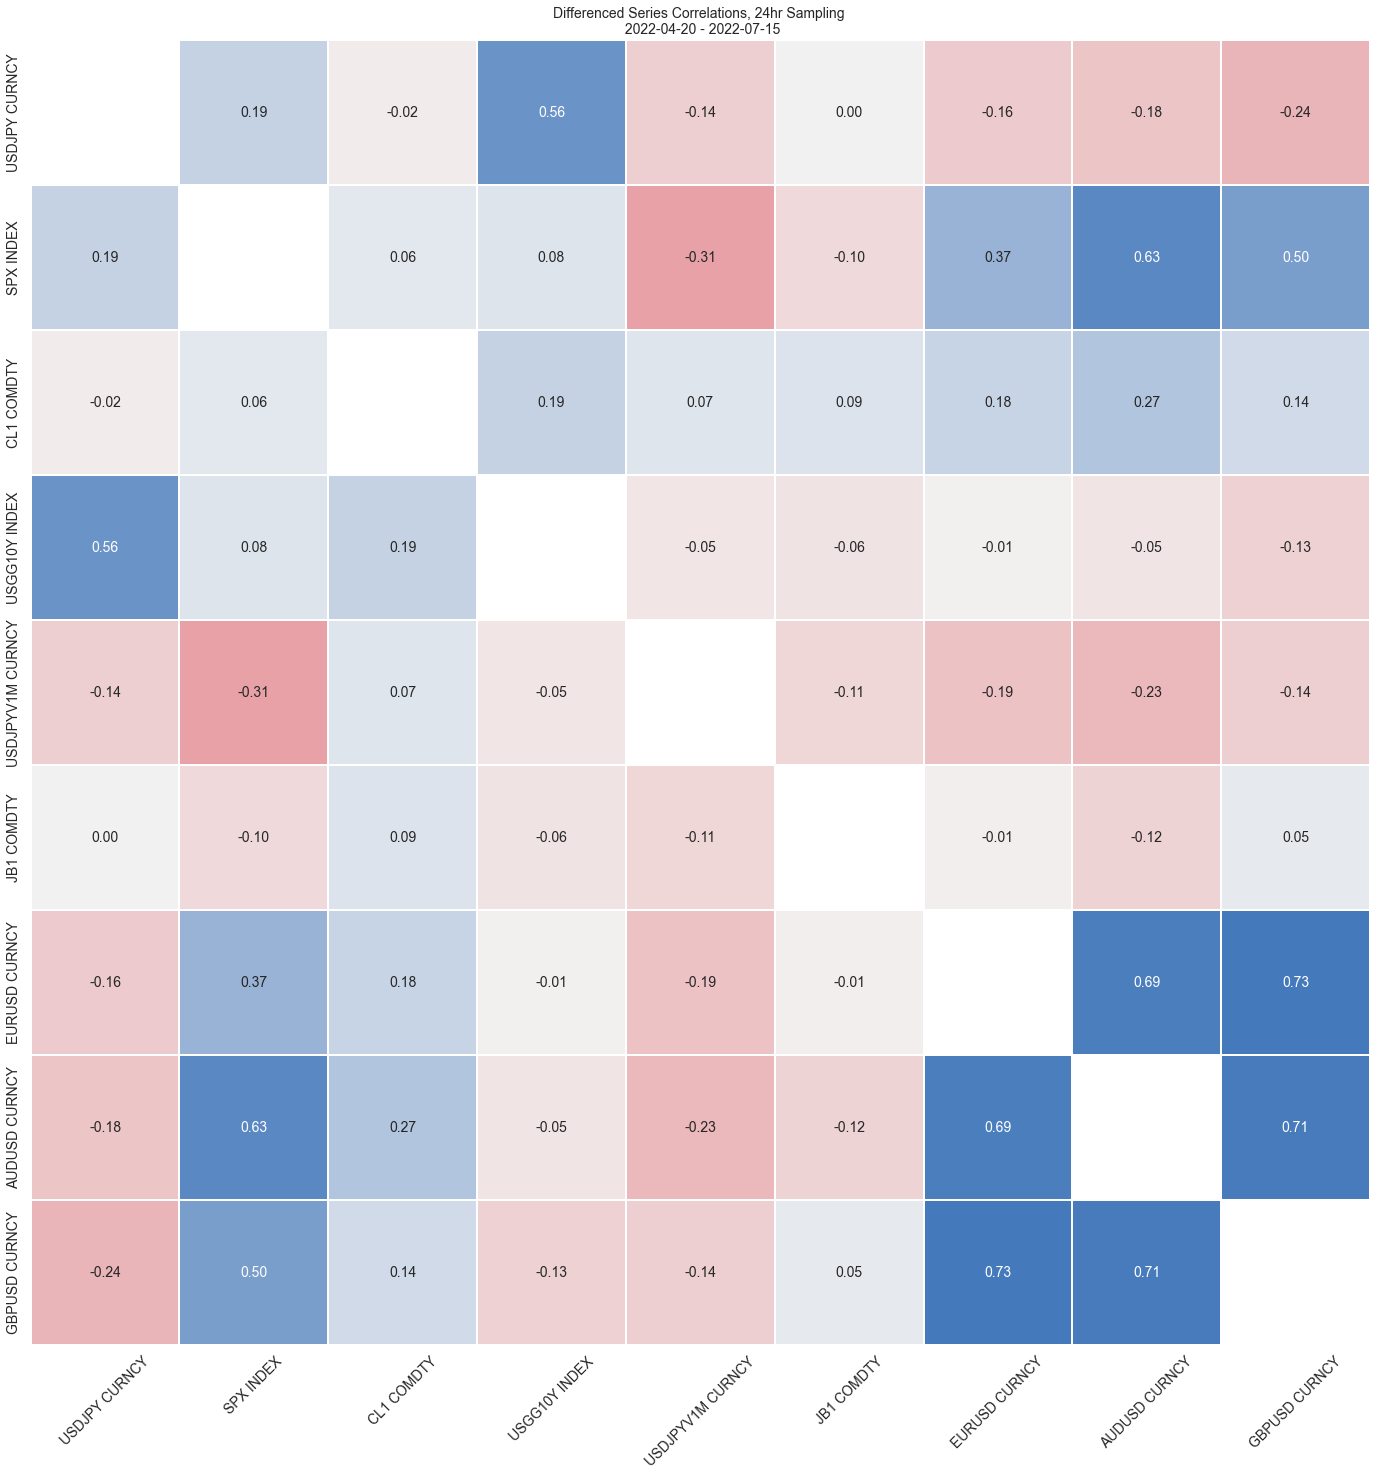

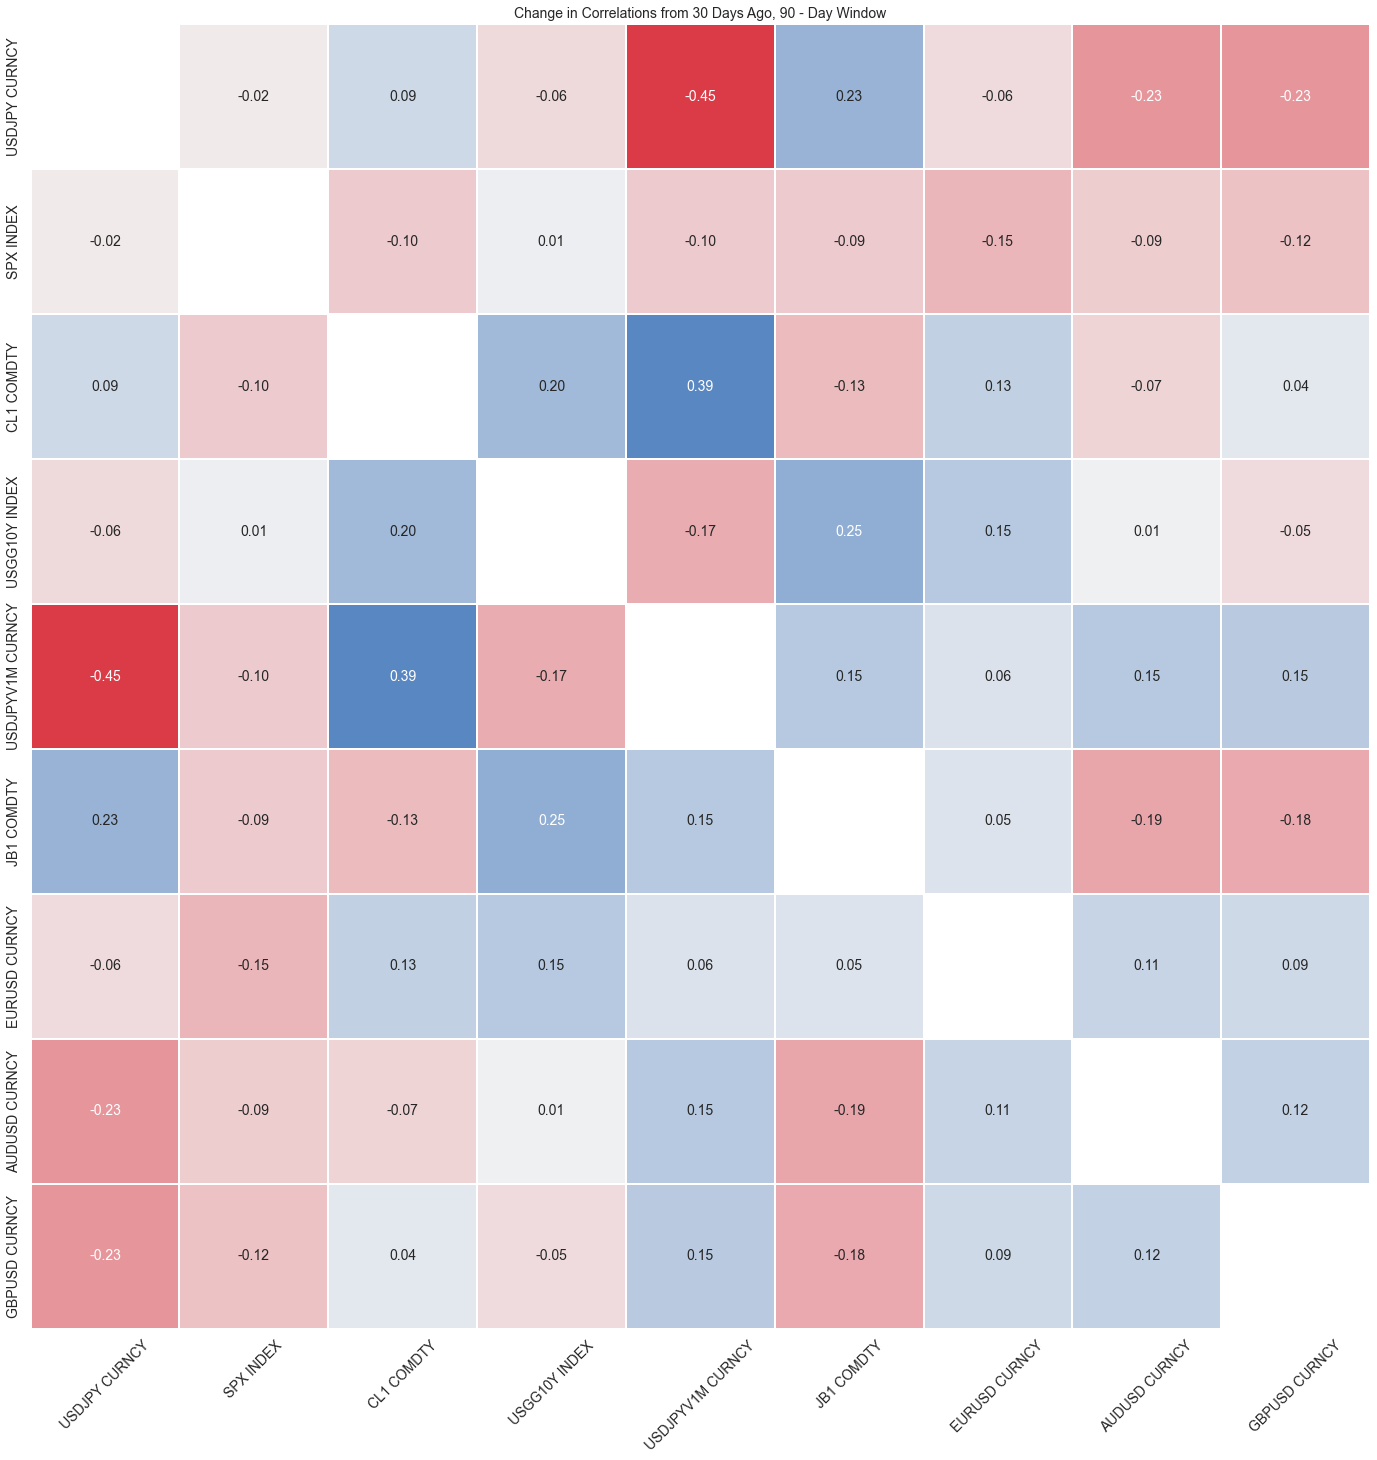

In [5]:
corr_matrix(params = vector, end_date = date, lookback_days = days, offset_days = offset_days)

In [12]:
JPY_vol_vector = ["USDJPY CURNCY", "PGCROMDU INDEX","FWISUS55 INDEX", "CTOTJPY INDEX", "TZT1 COMDTY",
                  "USGG10Y INDEX"]


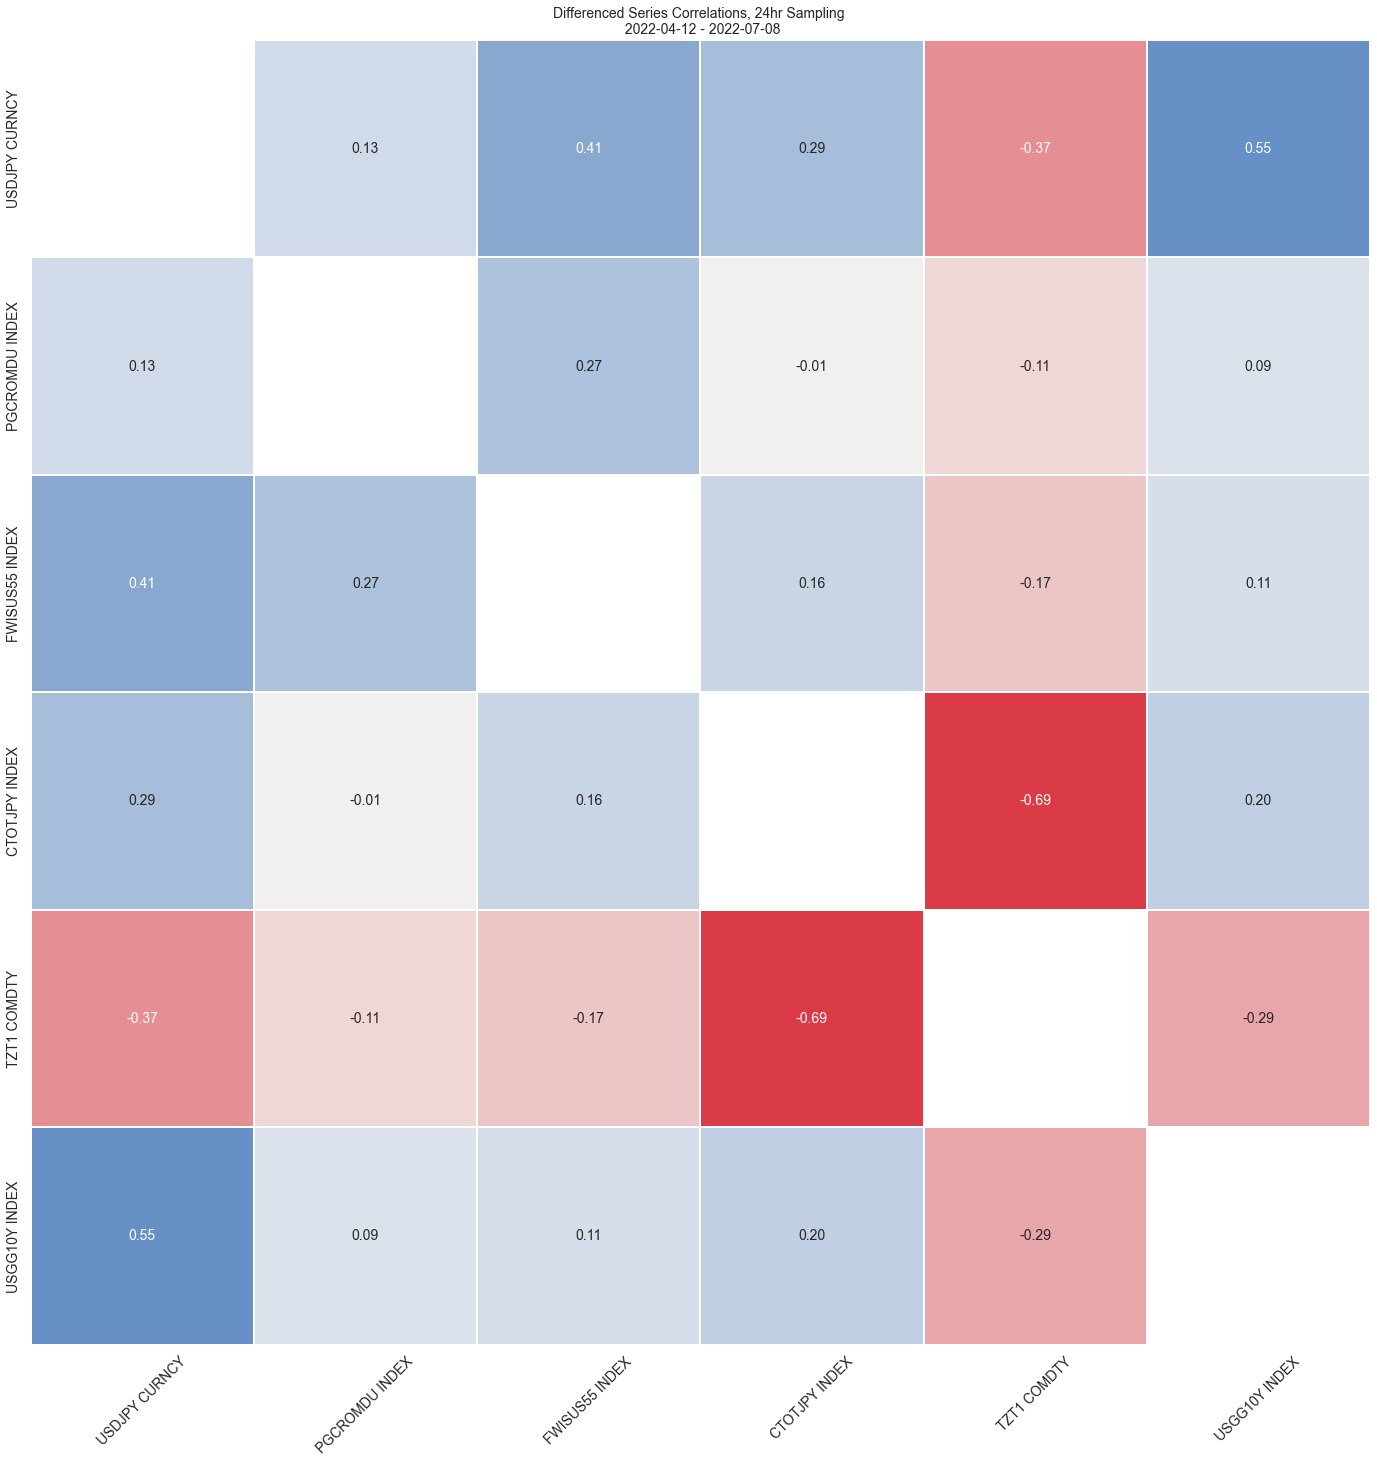

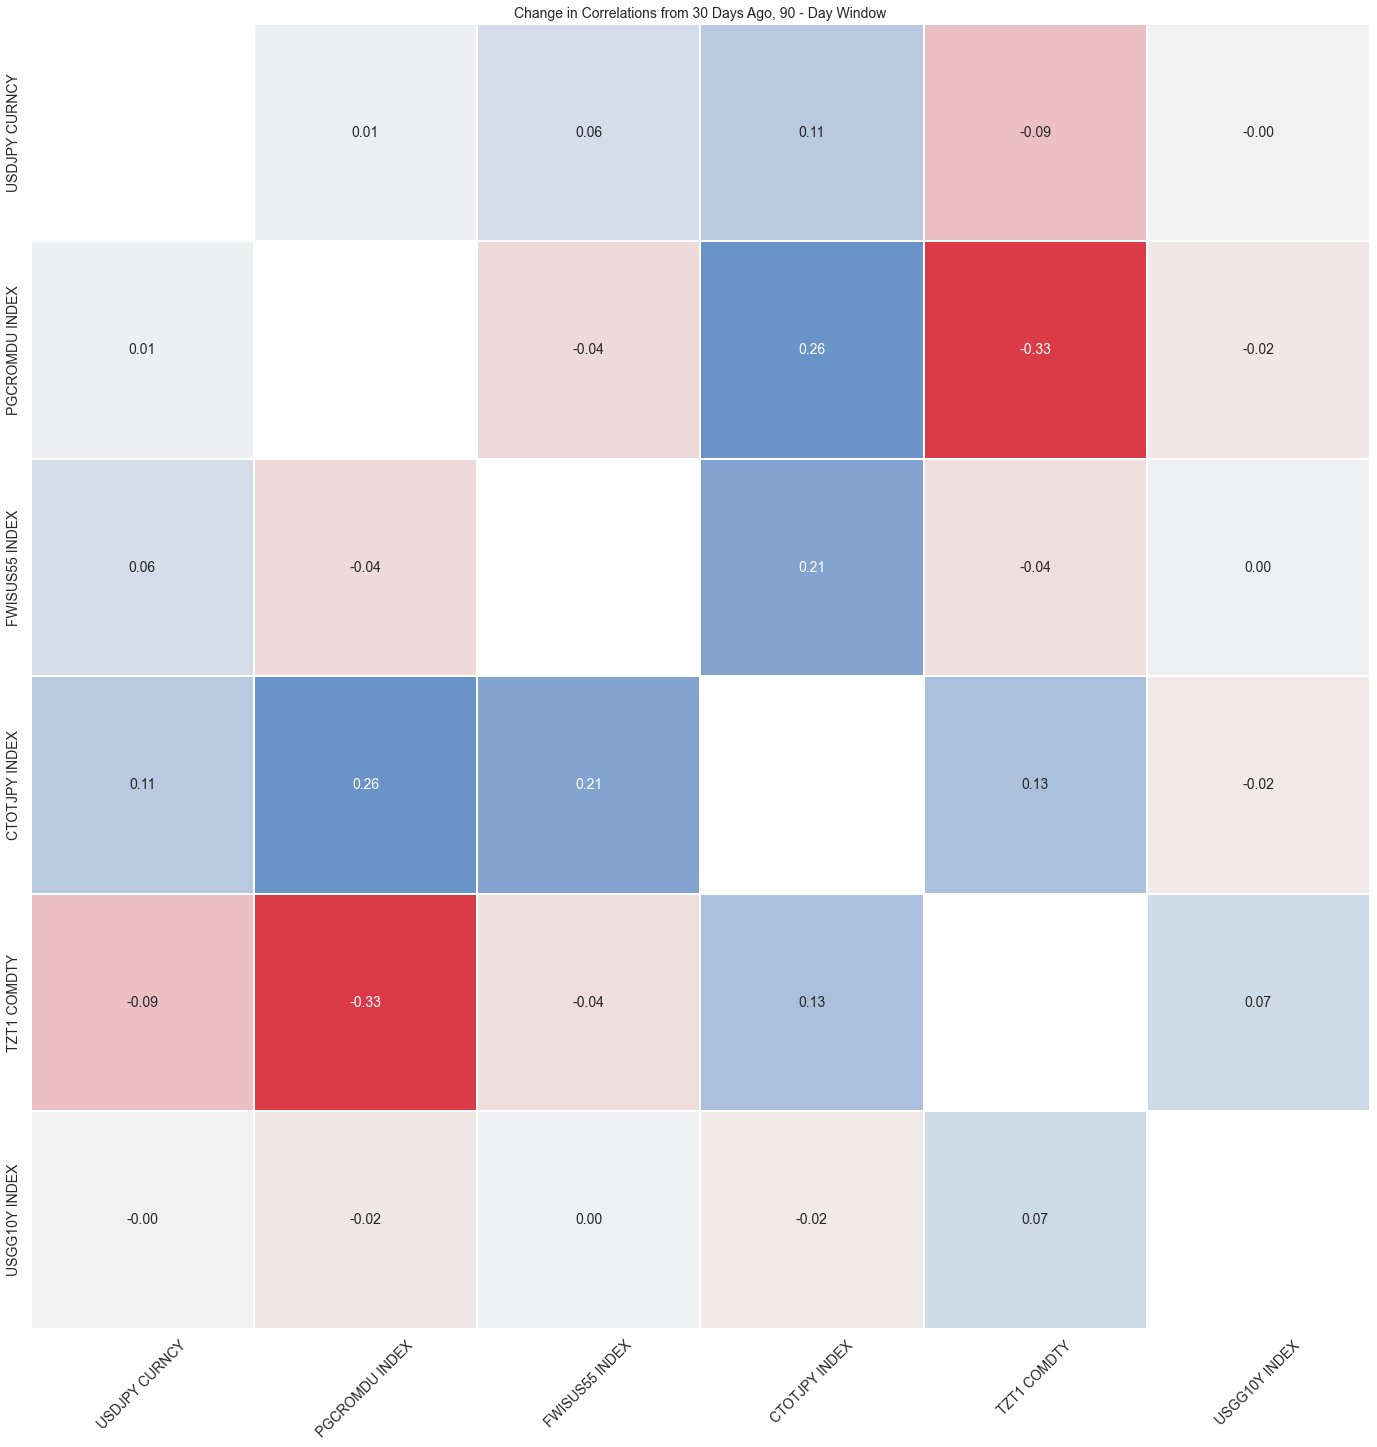

In [13]:
corr_matrix(params = JPY_vol_vector, end_date = date, lookback_days = days, offset_days = offset_days)

In [432]:
CAD = ["USDCAD CURNCY", "USDCADV2M CURNCY"]


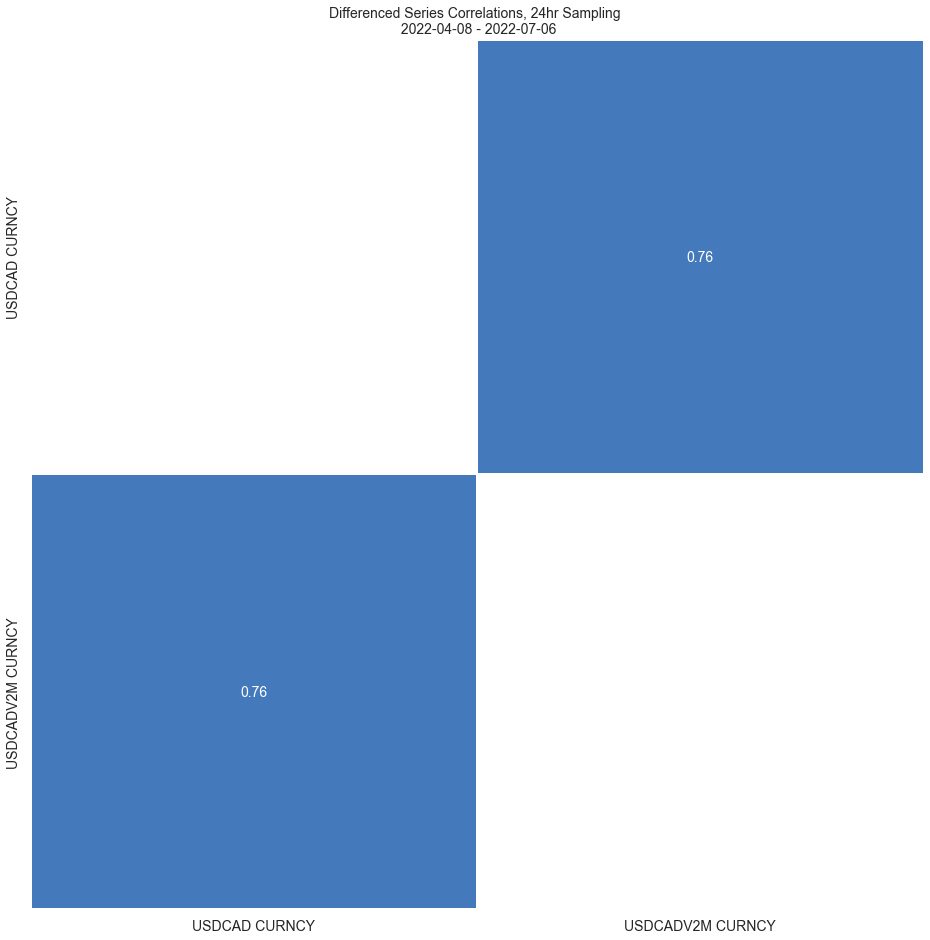

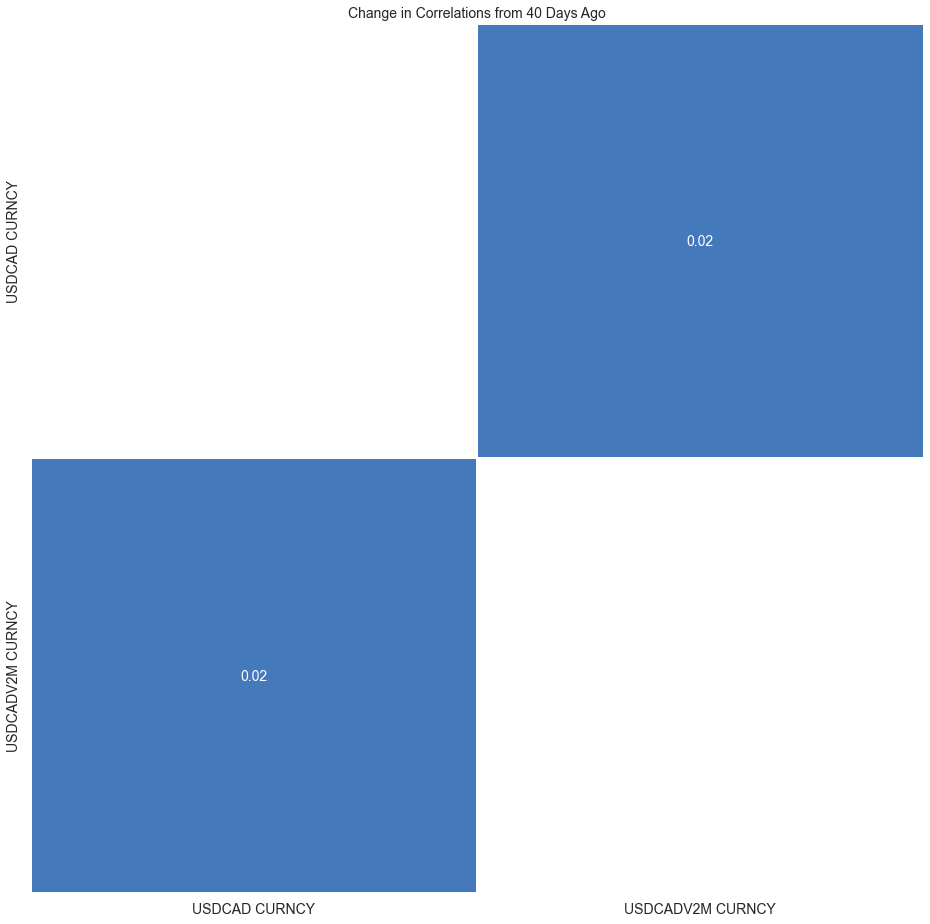

In [433]:
corr_matrix(params = CAD, end_date = date, lookback_days = days, offset_days = offset_days)

In [434]:
EUR_3M = ["EURUSD CURNCY", "EURUSDV3M CURNCY"]

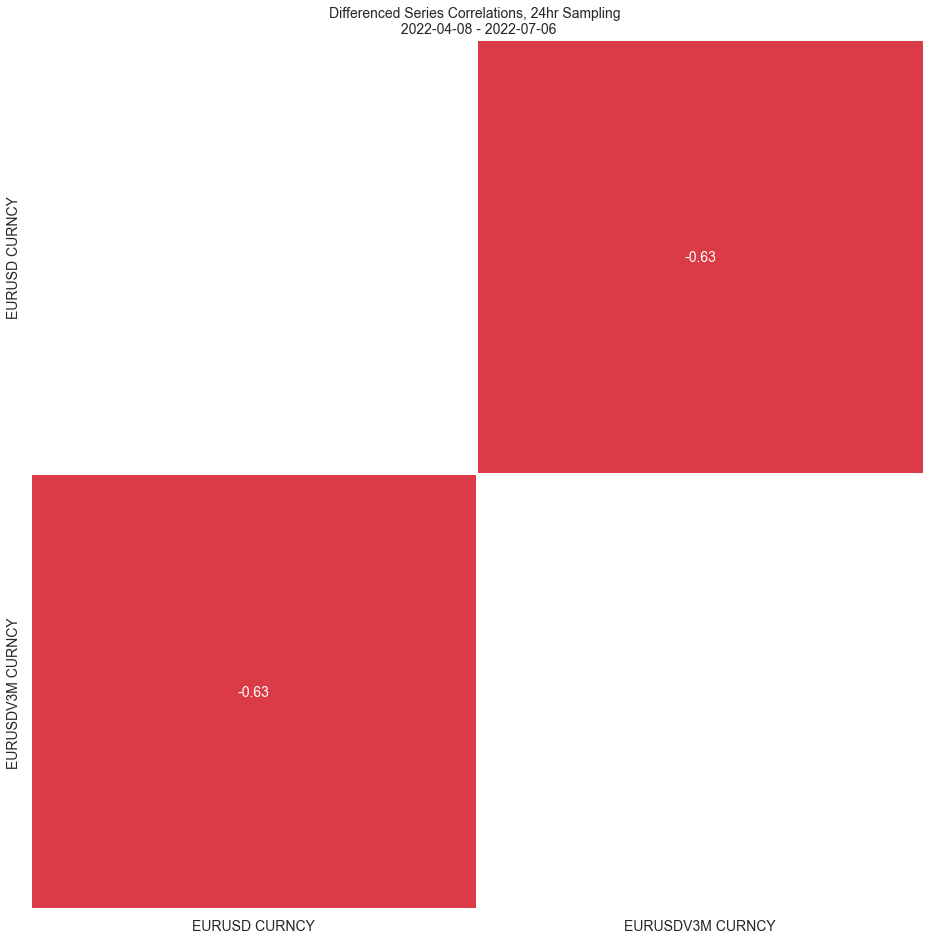

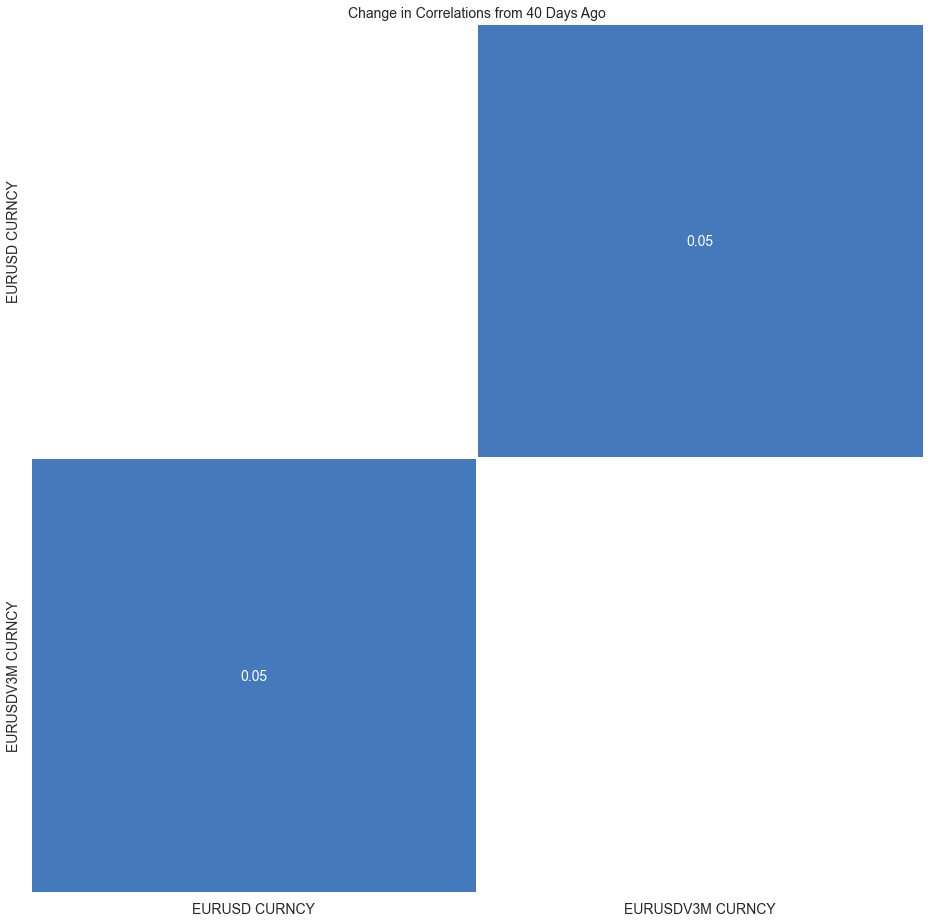

In [435]:
corr_matrix(params = EUR_3M, end_date = date, lookback_days = days, offset_days = offset_days)

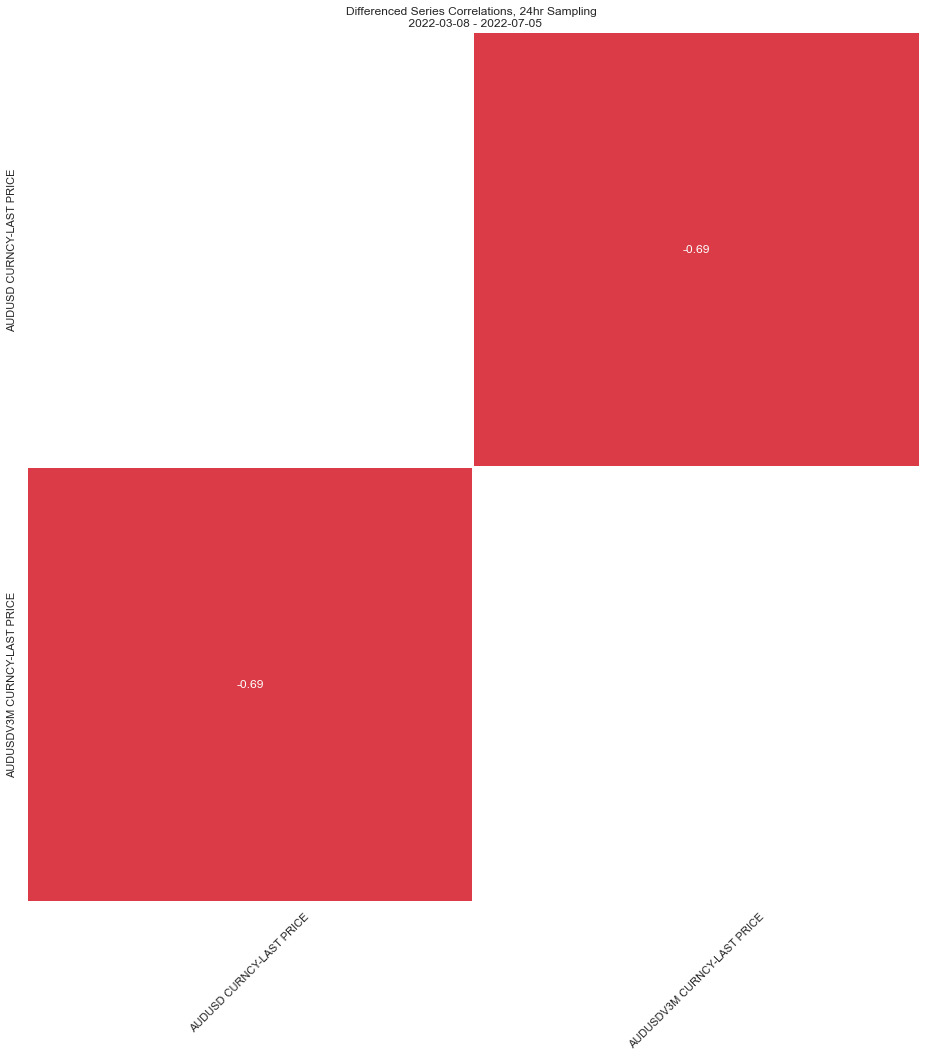

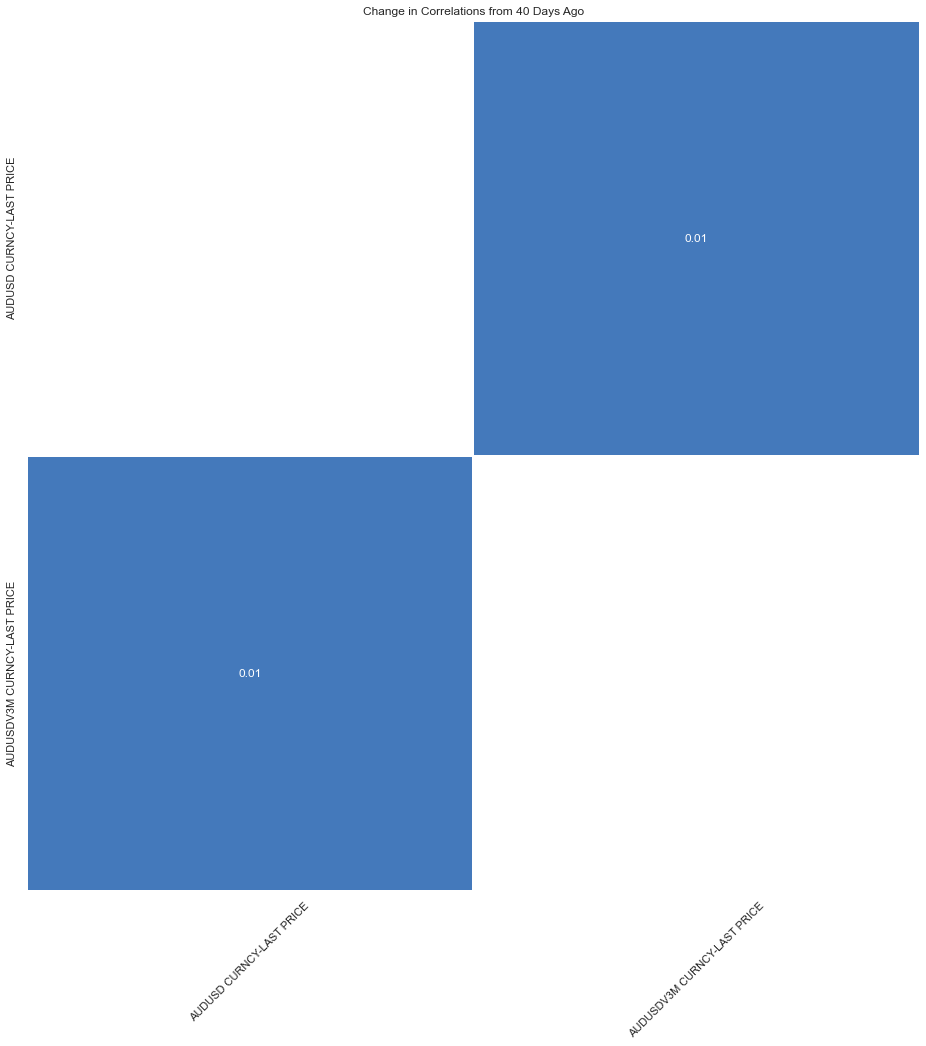

In [342]:
AUD_3M = ["AUDUSD CURNCY", "AUDUSDV3M CURNCY"]
corr_matrix(params = AUD_3M, end_date = date, lookback_days = days, offset_days = offset_days)

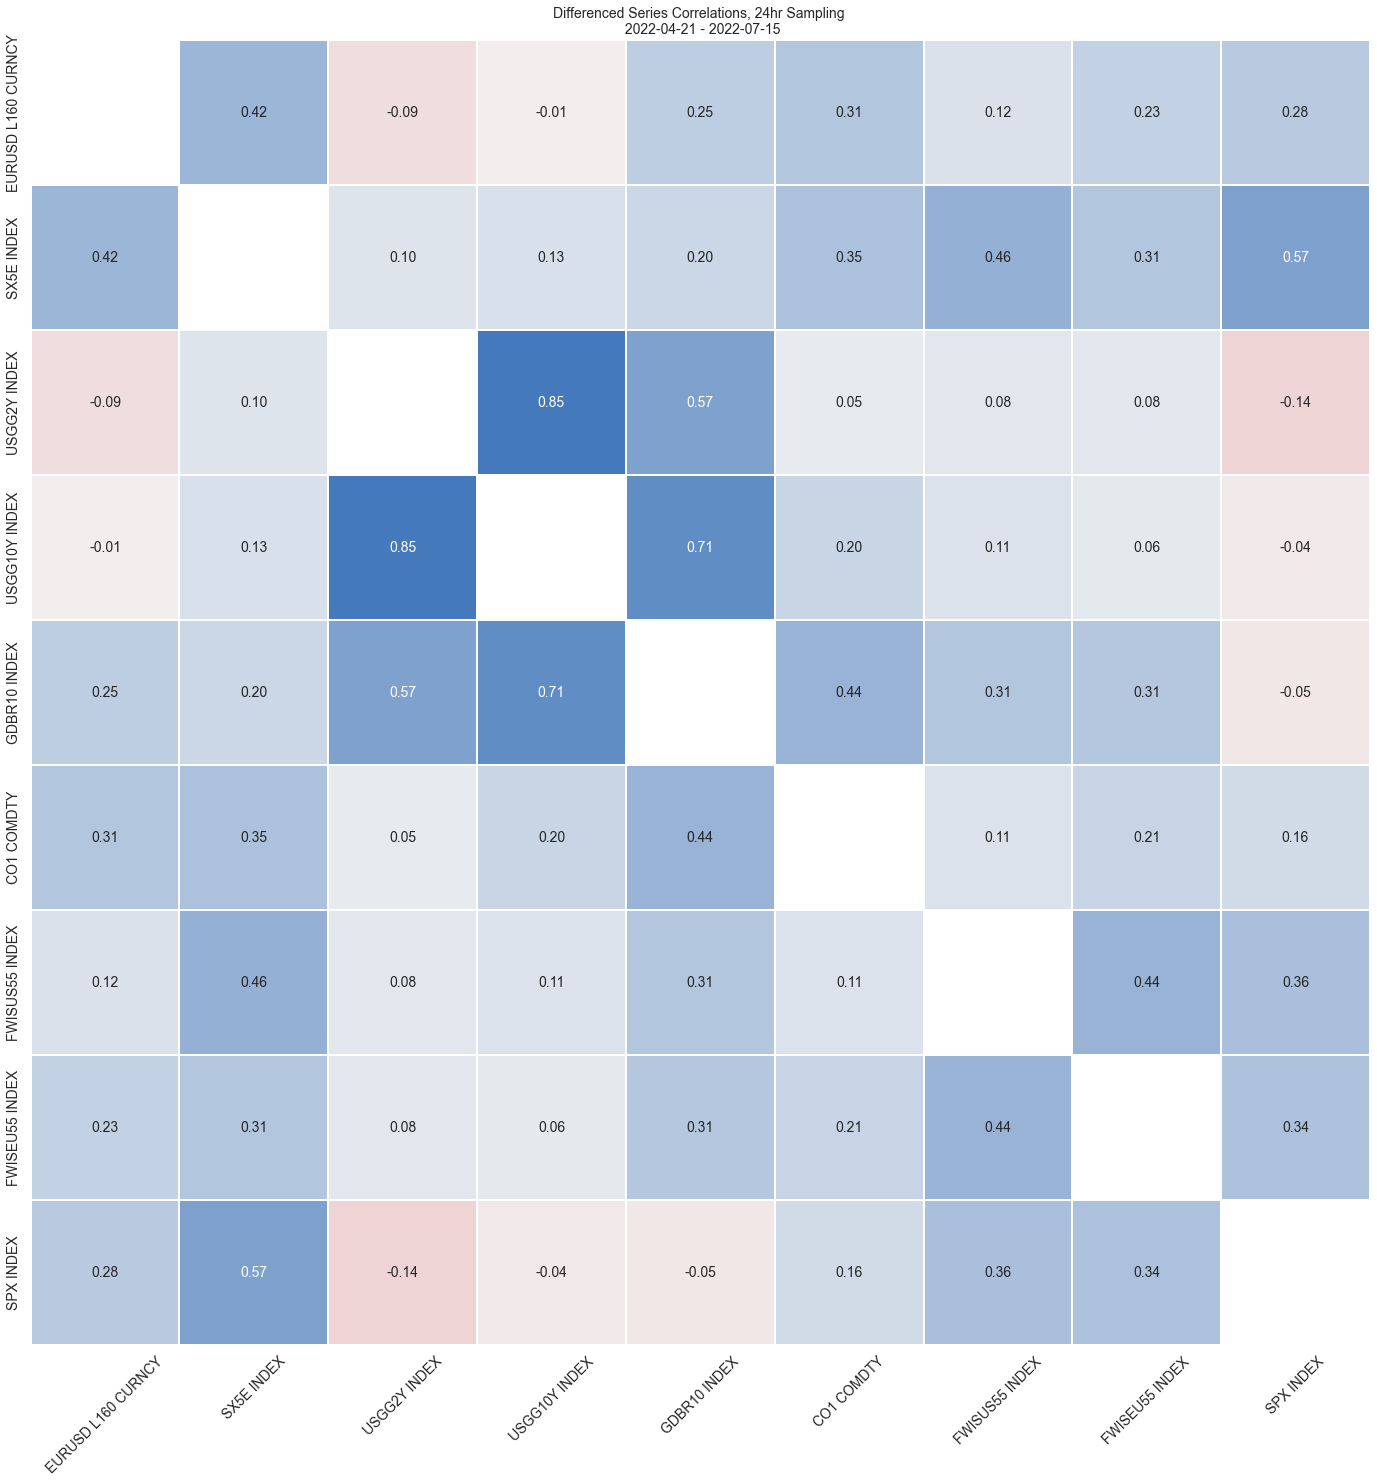

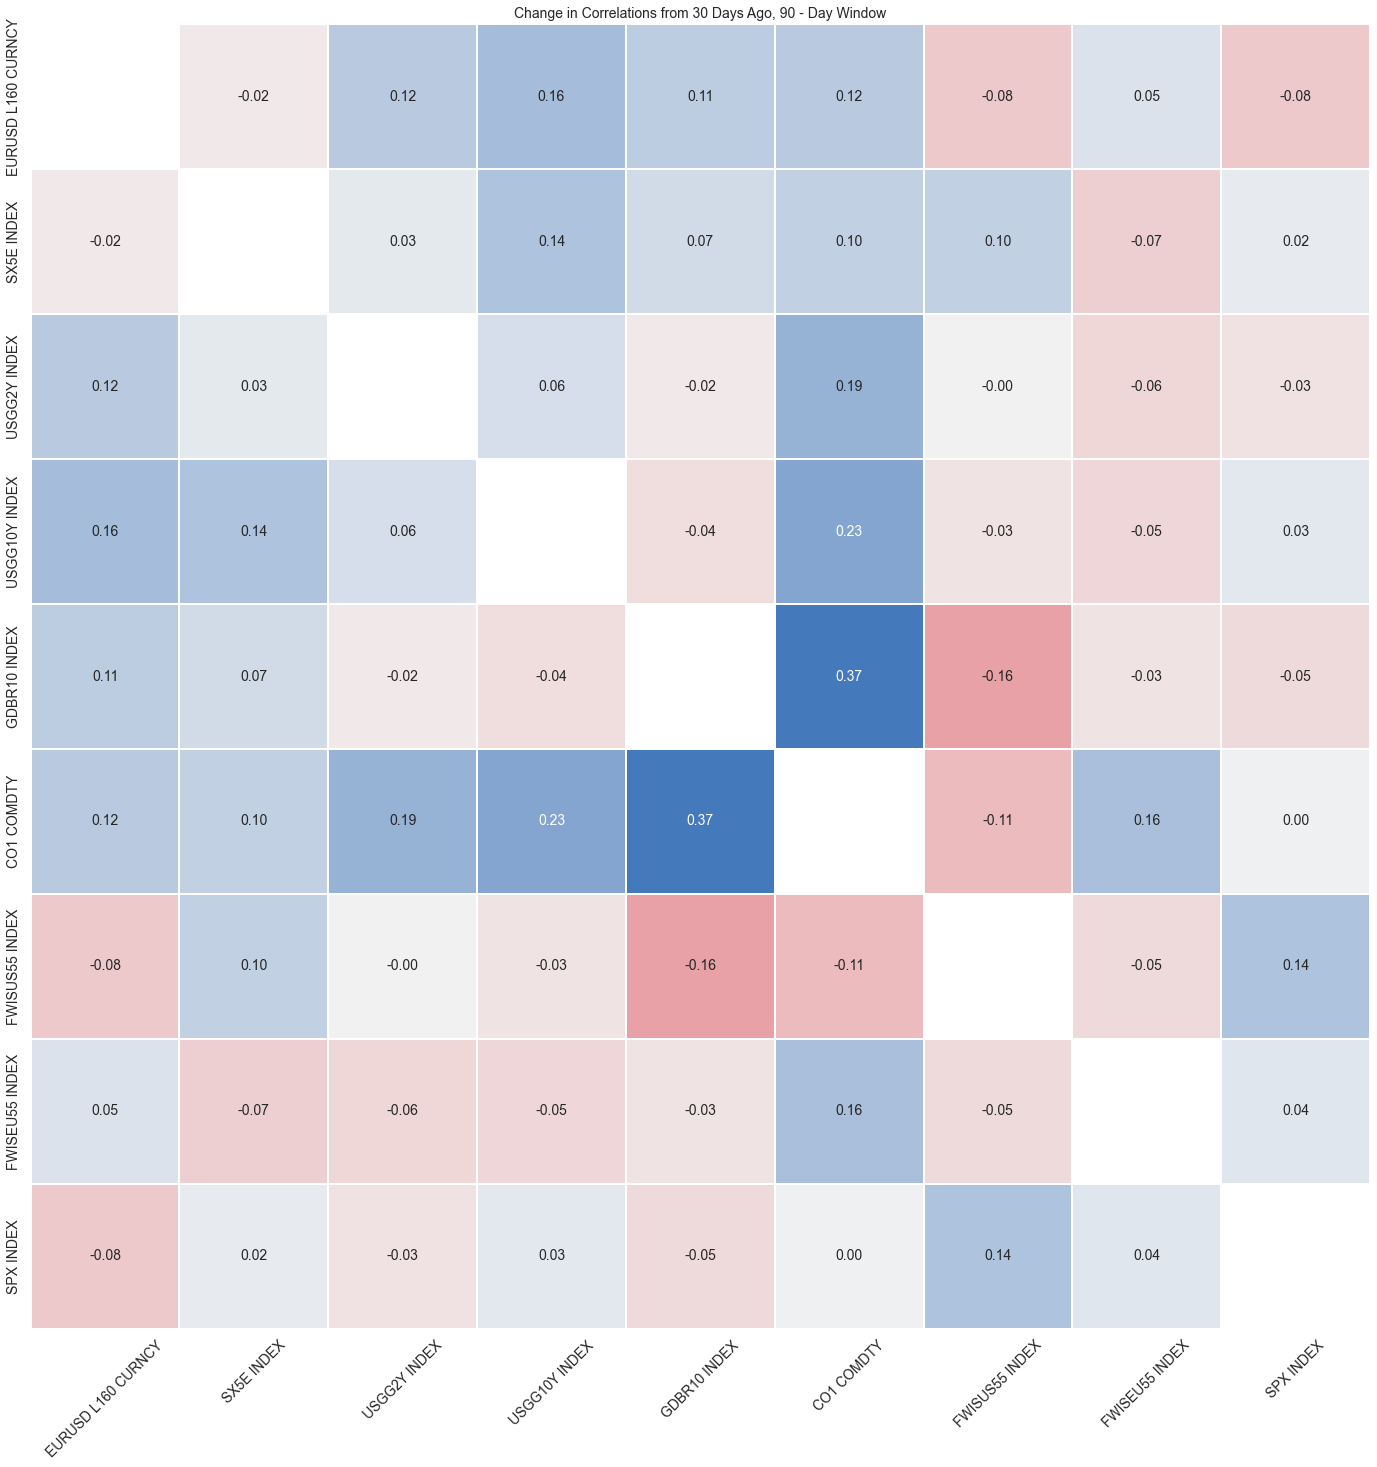

In [6]:
EURUSD_vector = ["EURUSD L160 CURNCY", "SX5E INDEX", "USGG2Y INDEX", "USGG10Y INDEX", "GDBR2Y INDEX", "GDBR10 INDEX", "CO1 COMDTY", "FWISUS55 INDEX", "FWISEU55 INDEX", "SPX INDEX"]
corr_matrix(params = EURUSD_vector, end_date = date, lookback_days = days, offset_days = offset_days)

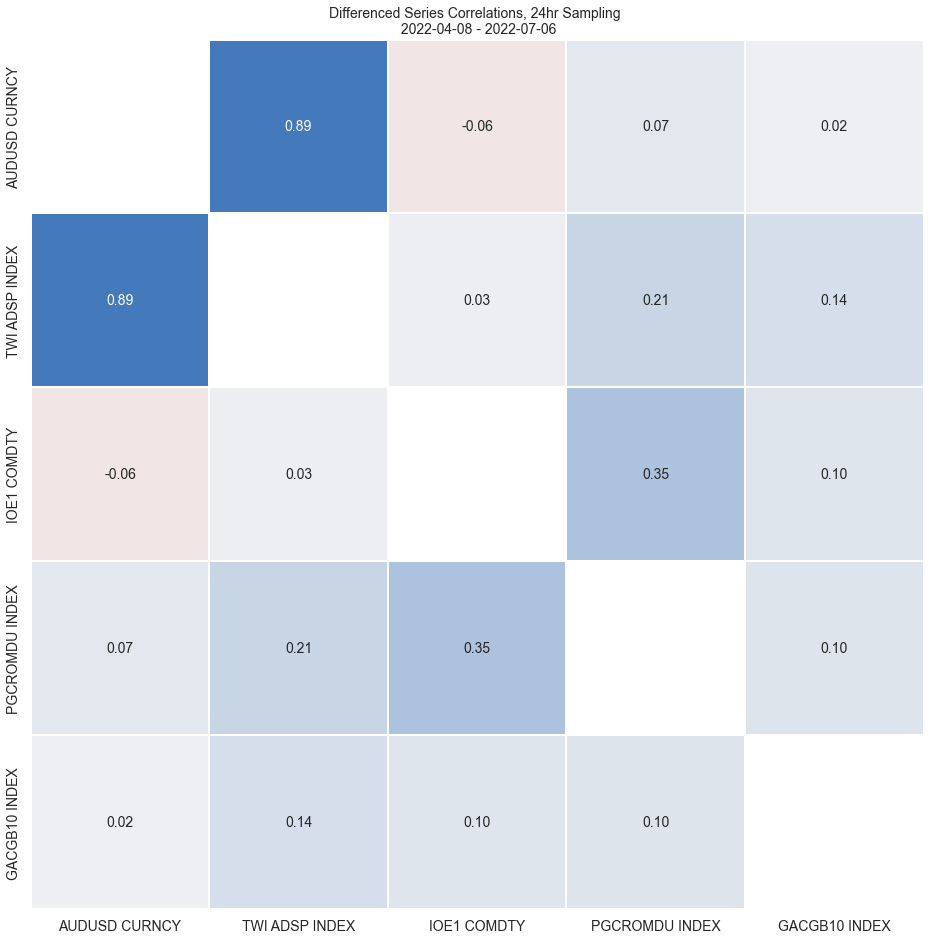

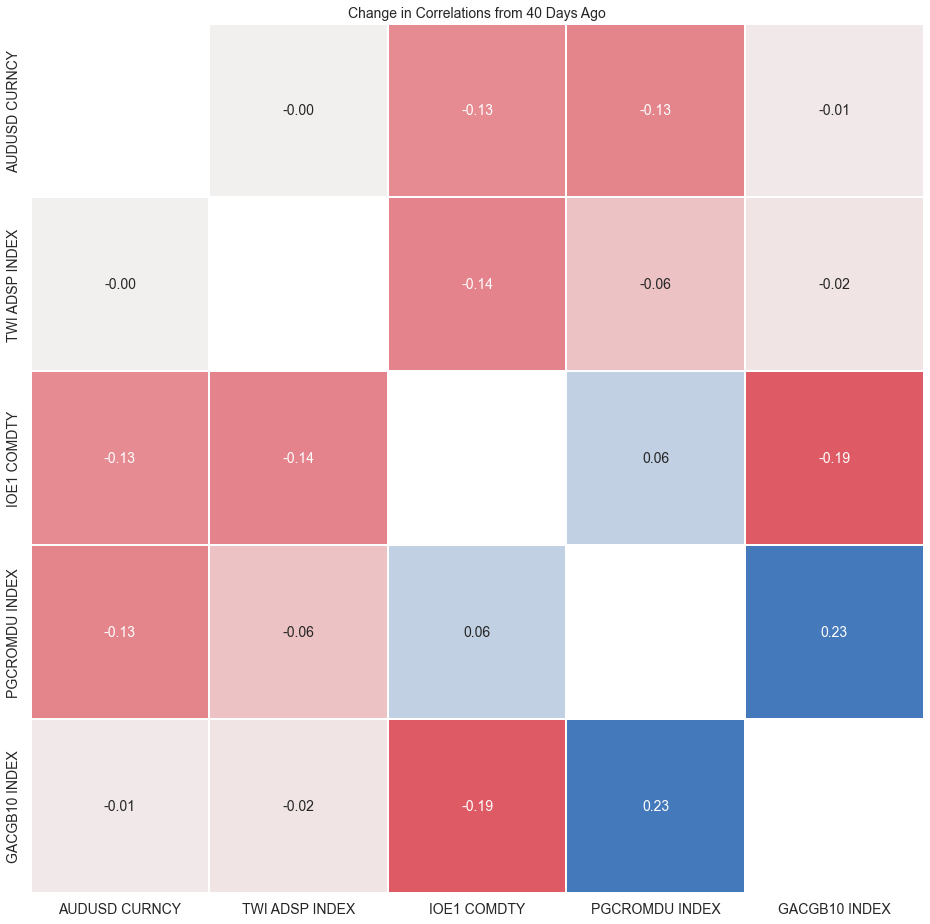

In [420]:
AUD_commod_vector = ["AUDUSD CURNCY", "TWI ADSP INDEX", "IOE1 COMDTY", "PGCROMDU INDEX", "GACGB10 INDEX"]
corr_matrix(params = AUD_commod_vector, end_date = date, lookback_days = days, offset_days = offset_days)

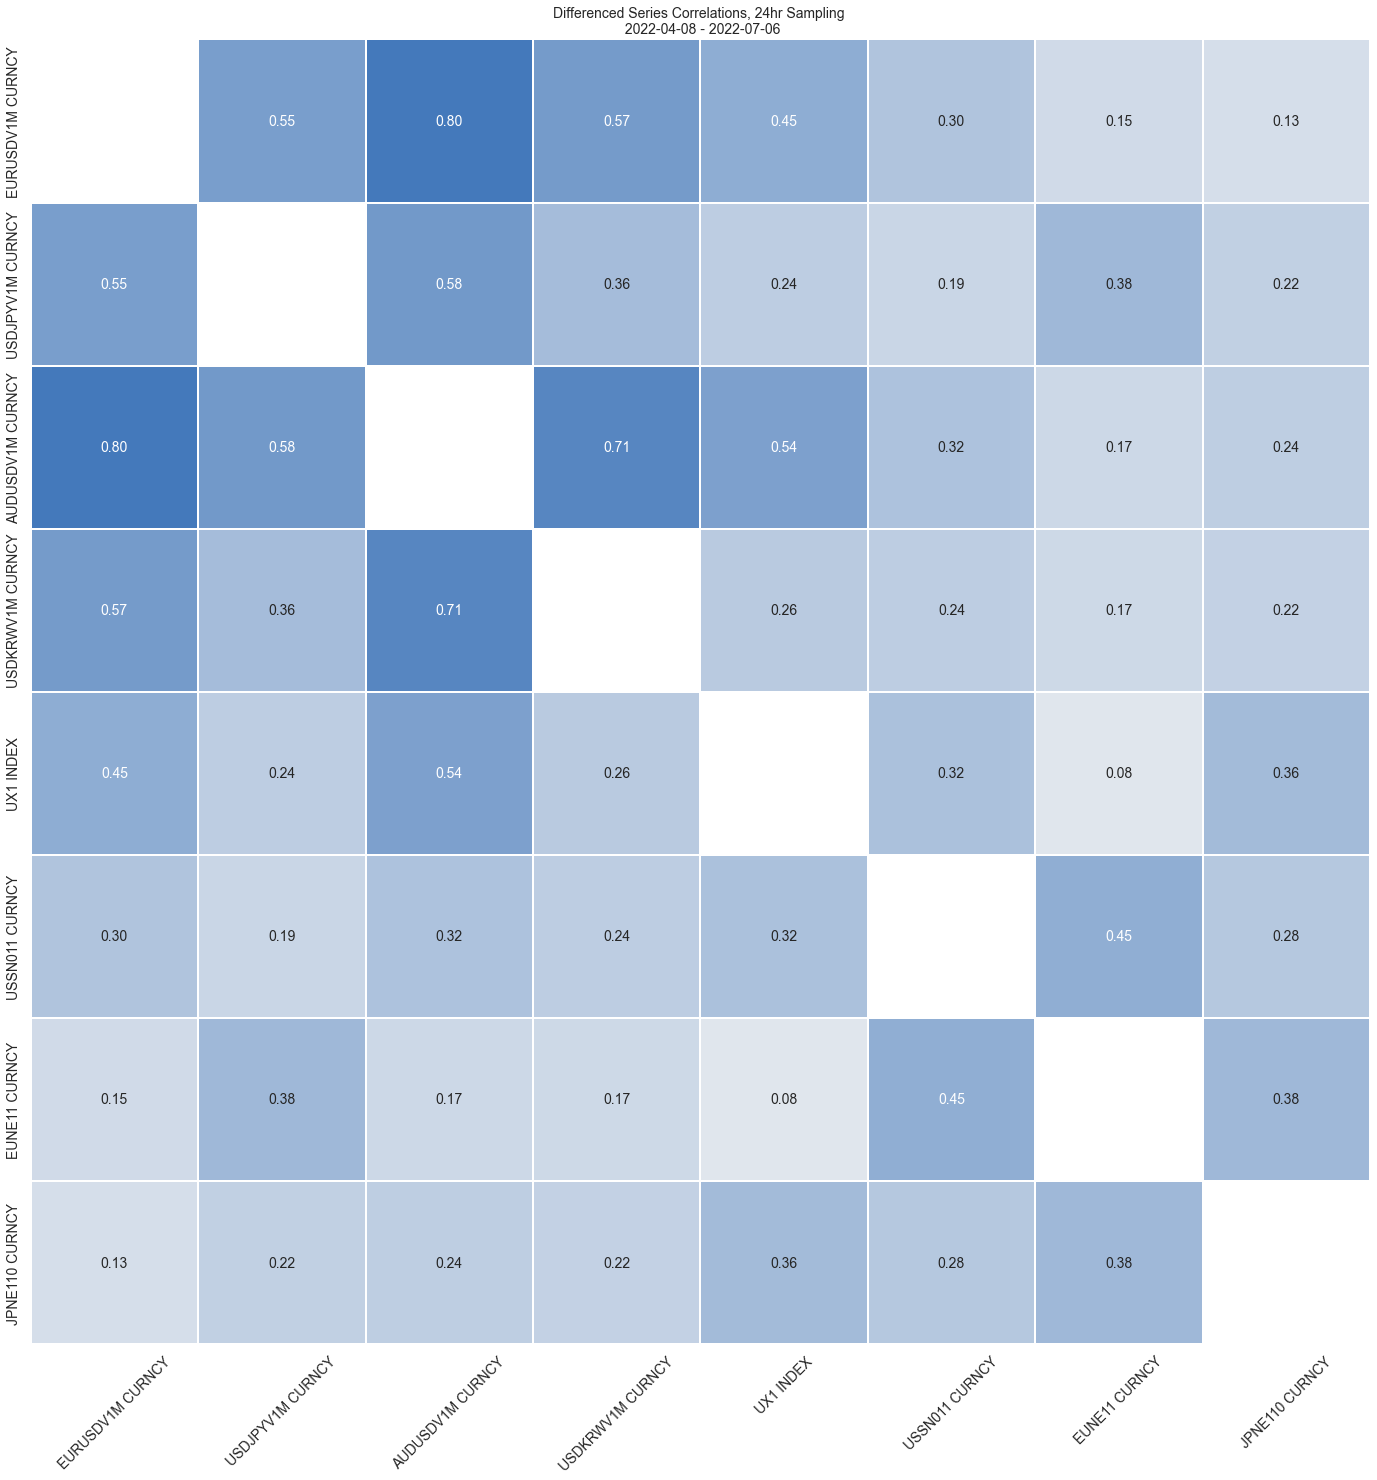

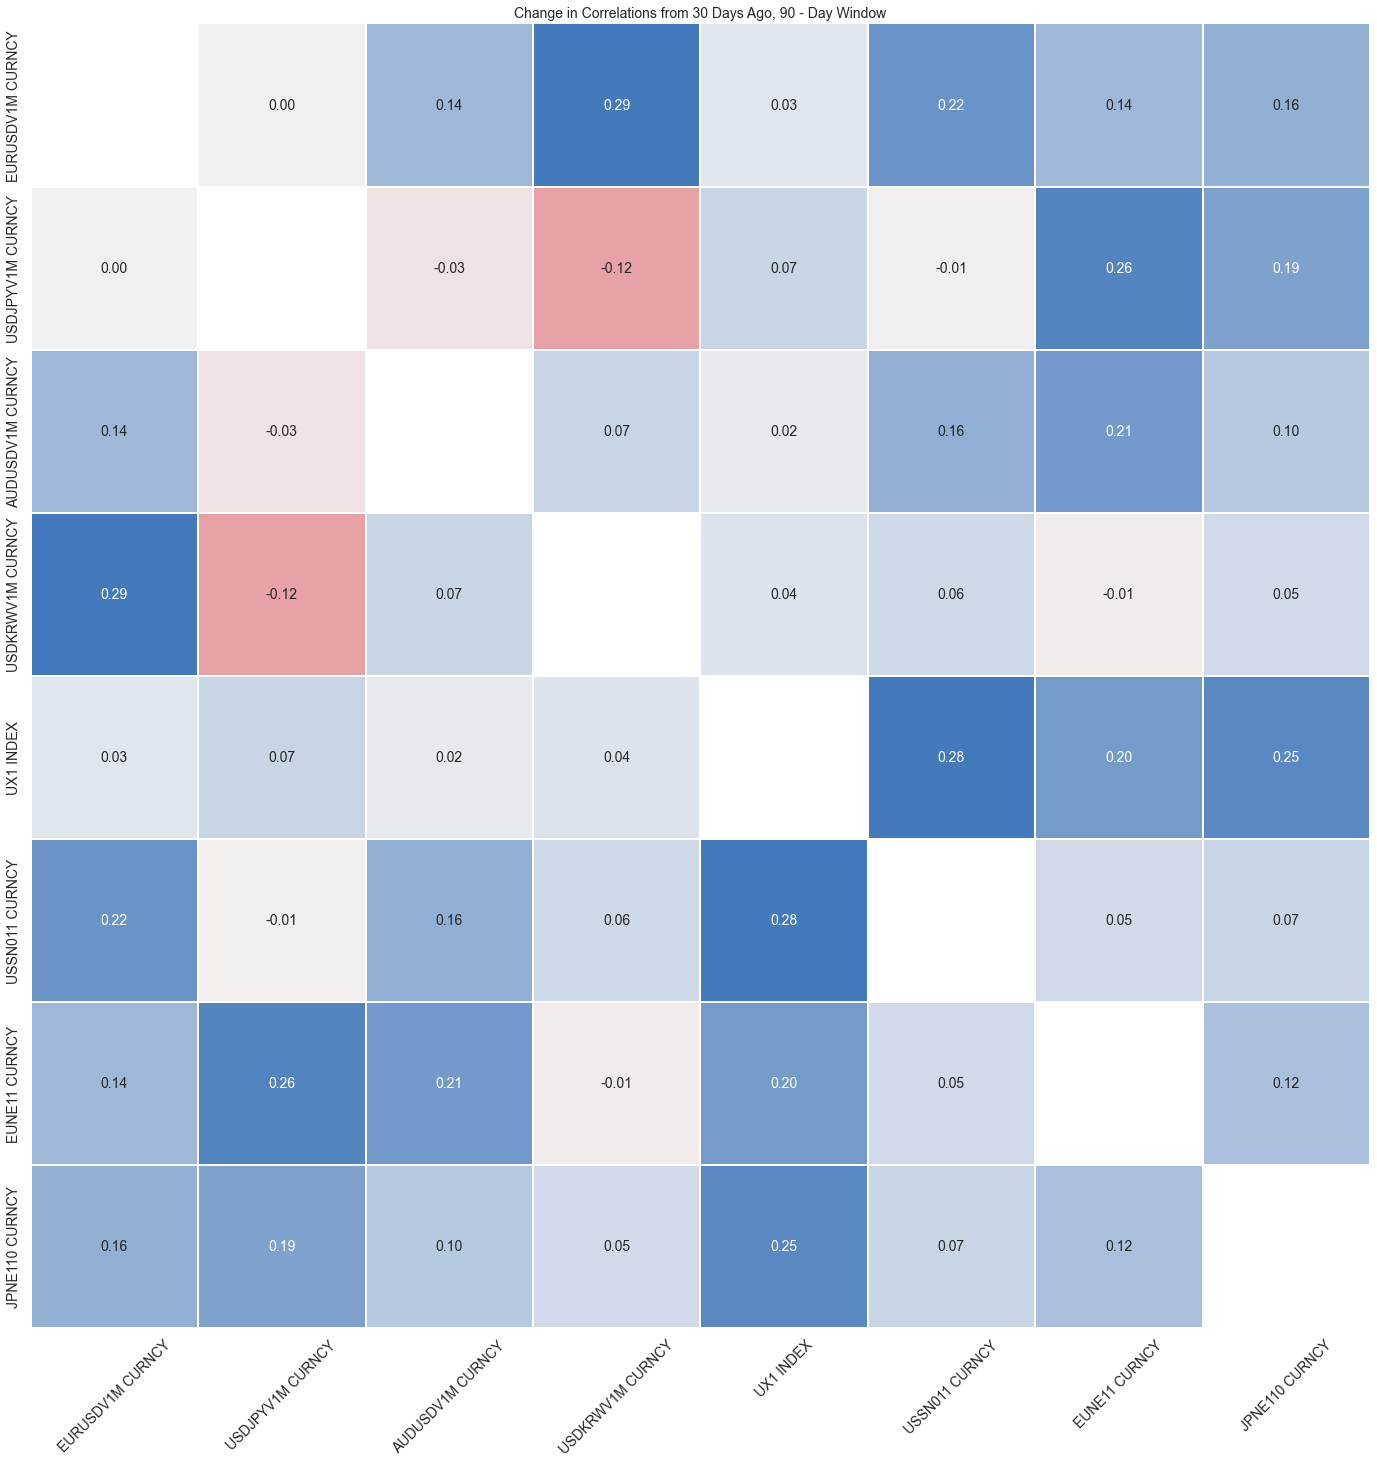

In [485]:
riskprem_vector = ["EURUSDV1M CURNCY", "USDJPYV1M CURNCY", "AUDUSDV1M CURNCY", "USDMXN V1M CURCNY", "USDKRWV1M CURNCY",
                  "UX1 INDEX", "USSN011 CURNCY", "EUNE11 CURNCY", "JPNE110 CURNCY"]
corr_matrix(params = riskprem_vector, end_date = date, lookback_days = days, offset_days = offset_days)

In [16]:
EUR_decomp = ["EURUSD CURNCY", "TWI EUSP INDEX", "GBTPGR10 INDEX", "GDBR10 INDEX", "USGG10Y INDEX", "TZT2 COMDTY", "CTOTEUR INDEX"]

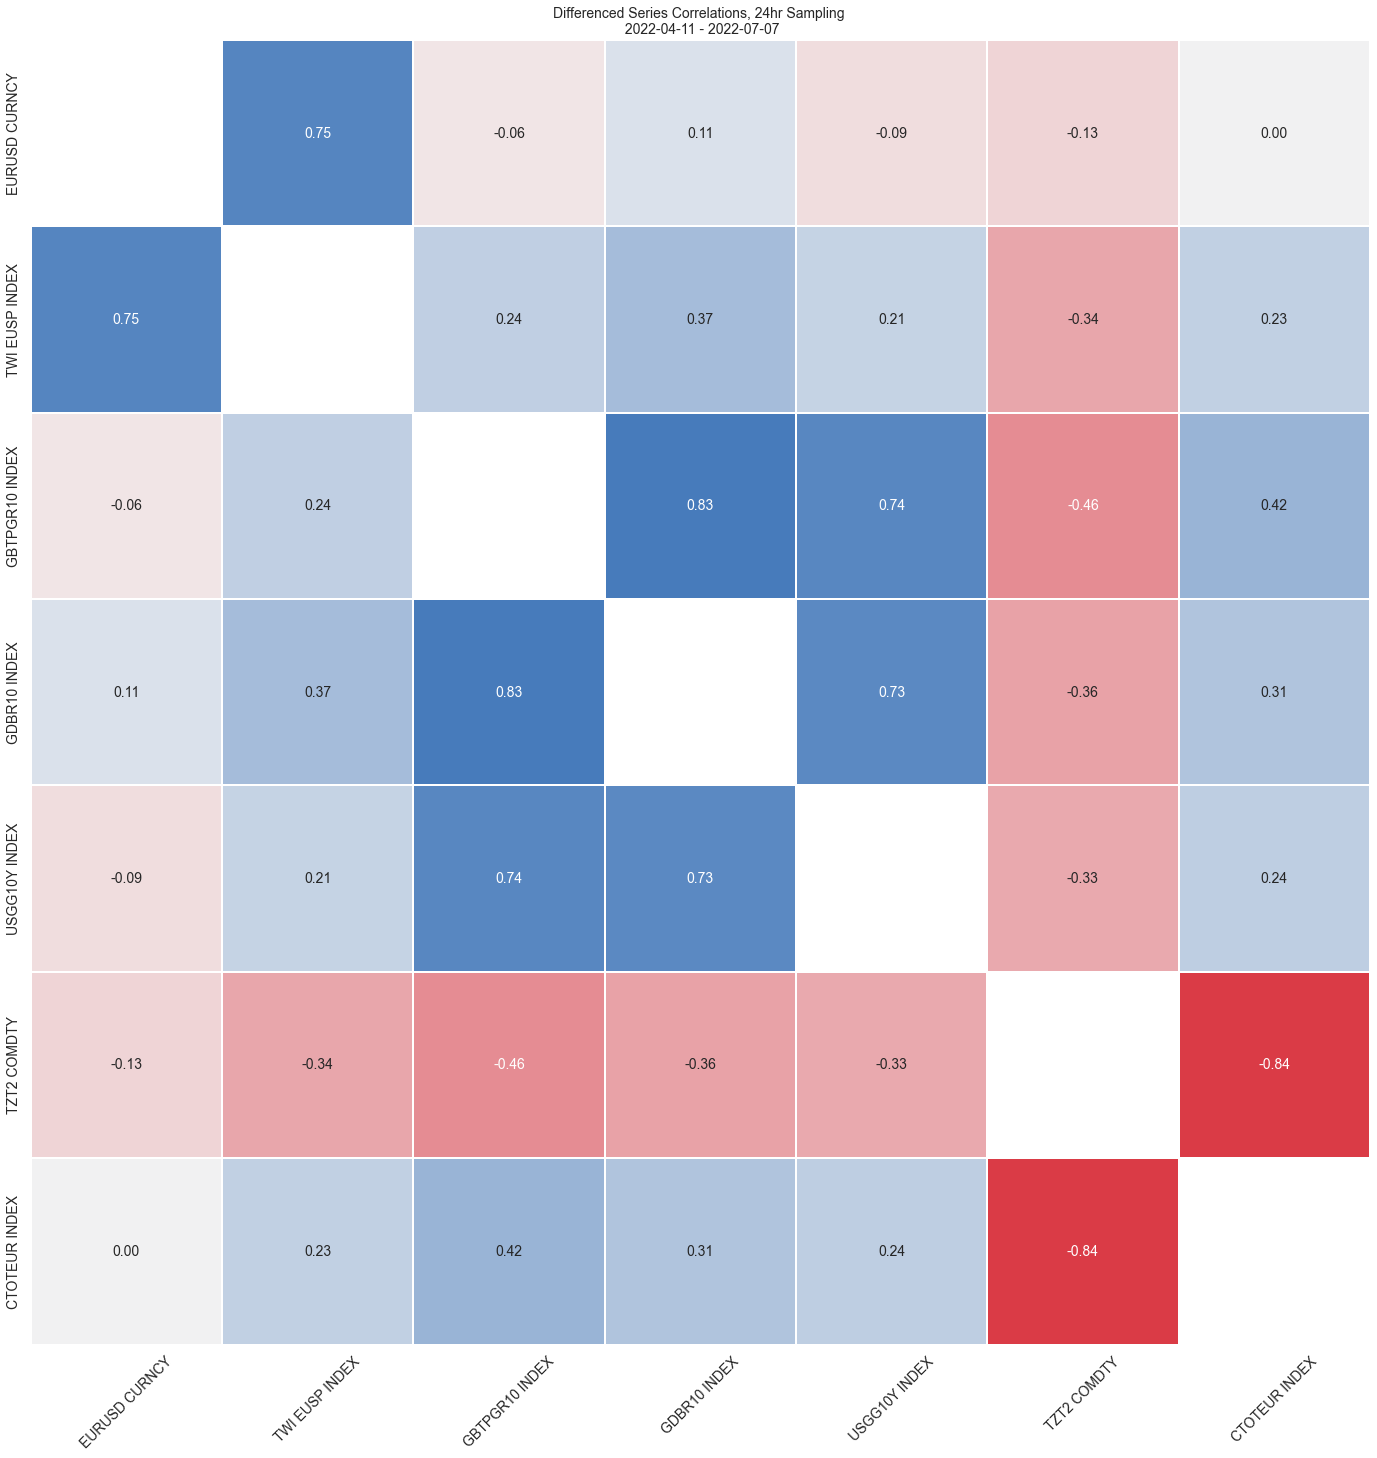

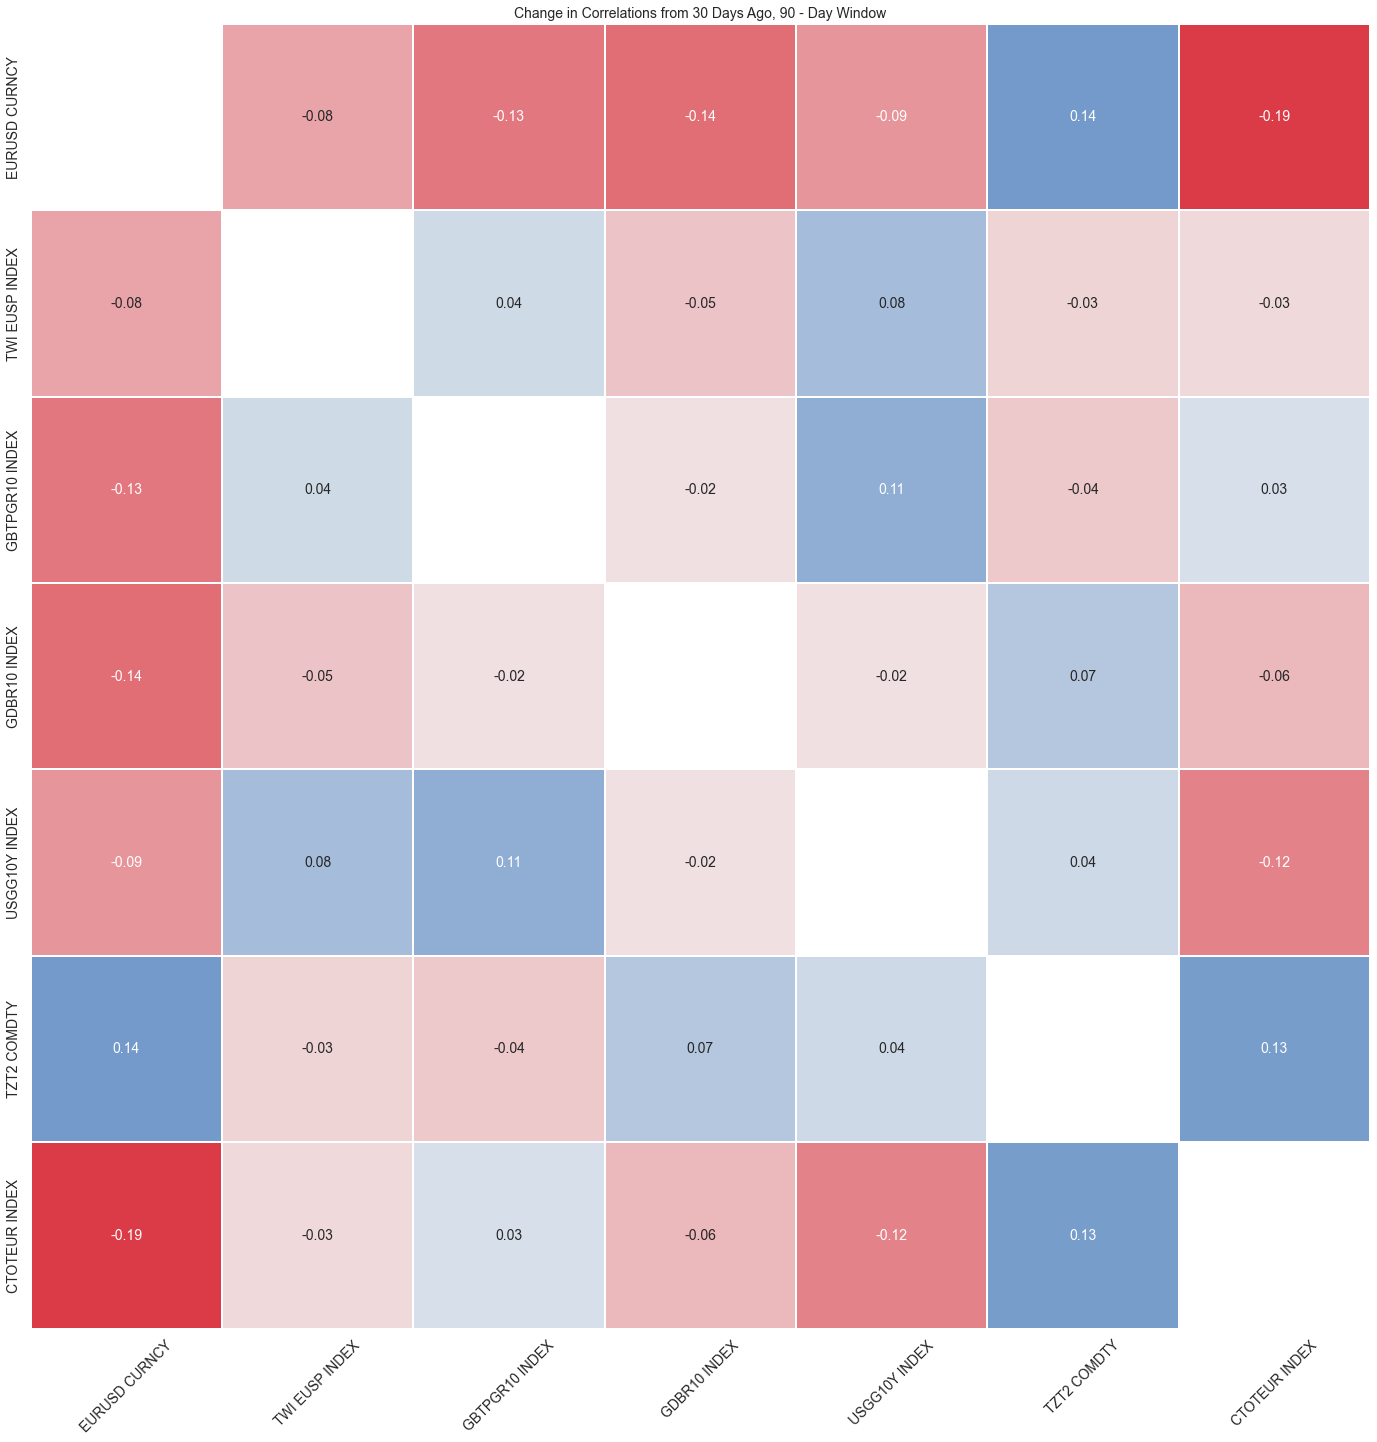

In [17]:
corr_matrix(params = EUR_decomp, end_date = date, lookback_days = days, offset_days = offset_days)